In [2]:
import thunder as td
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline
from regression import LinearRegression
import tifffile

In [3]:
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# conf = (SparkConf()
#          .setMaster("local")
#          .setAppName("My app")
#          .set("spark.executor.memory", "40g")
#          .set("spark.ui.port","8080")
#          .set("spark.driver.host","127.0.0.1")
#          .set("spark.local.dir","/mnt/tmp/")
#        )

# sc = SparkContext(conf = conf)
sc = SparkContext()

In [1]:
sc.stop()

NameError: name 'sc' is not defined

In [16]:
#input number of planes
data = tifffile.imread('/mnt/downloads/Emmanuel/EMM_fish32_6dpf_10looms_flaser_ftail_onight_range240_step10_exposure20_power10.tif')
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
data

Images
mode: spark
dtype: uint16
shape: (660, 25, 538, 380)

In [17]:
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
data

Images
mode: spark
dtype: uint16
shape: (660, 25, 538, 380)

In [18]:
from registration import CrossCorr
algorithm = CrossCorr()

In [19]:
reference = data.mean()
reference.shape

(1, 25, 538, 380)

In [20]:
reference=reference.first()
reference.shape

(25, 538, 380)

In [21]:
model = algorithm.fit(data,reference)

In [22]:
Corrected=model.transform(data)
Corrected

Images
mode: spark
dtype: uint16
shape: (660, 25, 538, 380)

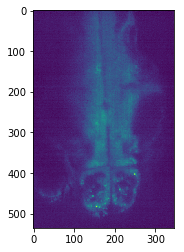

In [10]:
plt.imshow(Corrected[0,10])

In [ ]:
plt.imshow(data[0,10])

In [ ]:
temp=data[0,10].toarray()-Corrected[0,10].toarray()

In [ ]:
plt.imshow(temp)

In [ ]:
temp=data[600,10].toarray()-Corrected[600,10].toarray()
plt.imshow(temp)

In [23]:
filtered = Corrected.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
filtered.npartitions()

5000

In [24]:
regressor=scipy.io.loadmat('/mnt/downloads/Emmanuel/Loom_regressors2.mat')
regressor=regressor['Regressors']

In [ ]:
spike=[0.231927459, 1.649442638, 4.980908923, 1.490147774, 0.548712094, 0.234322333, 0.165871831, 0.039443932]
Lena_regressor=np.zeros((4,300))
spike=[0.231927459, 1.649442638, 4.980908923, 1.490147774, 0.548712094, 0.234322333, 0.165871831, 0.039443932]
for i in [68, 82, 115,150,157,189,200,218,232]:
    Lena_regressor[0,i:i+len(spike)]=spike
for i in [75, 89, 108,164,171,182,207,225,239]:
    Lena_regressor[1,i:i+len(spike)]=spike
for i in [64, 100, 122,157,174,178,189,196,210,214,228,232]:
    Lena_regressor[2,i:i+len(spike)]=spike
for i in [60, 96, 104,150,167,178,185,196,200,214,218,242]:
    Lena_regressor[3,i:i+len(spike)]=spike    
regressor=Lena_regressor

In [25]:
regressor.shape

(10, 660)

In [26]:
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)

In [27]:
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Emmanuel/Results_EMM_fish32_6dpf_10looms_flaser_ftail_onight_range240_step10_exposure20_power10_corrected.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [28]:
betas.shape

(25, 538, 380, 11)

In [ ]:
model = algorithm.fit(data,reference)

In [ ]:
#input number of planes
#input number of planes
data = tifffile.imread('/mnt/downloads/Lena/CA8_AllButFlow_F2_range250_step5_exposure20_power40_1.tif')
data = data[:,22:45]
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
reference = data.mean()
reference=reference.first()
model = algorithm.fit(data,reference)
Corrected=model.transform(data)
filtered = Corrected.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Lena/Ca8_AllButFlow_F2.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [ ]:
filtered = data.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Lena/Ca8_AllButFlow_F2.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [ ]:
#input number of planes
data = tifffile.imread('/mnt/downloads/Lena/HS_CA8_OMR_AUD_5reps_range100_step5_exposure20_power40.0_3.tif')
data = td.images.fromarray(data, engine=sc, npartitions=5000)
data = data.repartition(5000)
filtered = data.toseries().detrend('linear').normalize()
filtered=filtered.repartition(5000)
algorithm = LinearRegression()
model = algorithm.fit(regressor.T,filtered)
r2 = model.score(regressor.T,filtered)
#change the name of files to what you want to save
r2_d=r2.toarray()
betas = model.betas.toarray()
scipy.io.savemat('/mnt/downloads/Lena/Results_CA8_OMR5rep_fish4.mat',mdict={'Betas':betas,'rsquared':r2_d})

In [ ]:
reference = data.mean()
reference=reference.first()
reference.shape

In [ ]:
model = algorithm.fit(data,reference)

In [ ]:
Corrected=model.transform(data)
Corrected.npartitions

In [ ]:
filtered = Corrected.toseries().squelch(500).detrend('linear').normalize()
filtered=filtered.repartition(5000)

In [ ]:
from factorization import PCA
algorithm = PCA(k=3)
T, W_T = algorithm.fit(filtered)

In [ ]:
plt.figure(figsize = (30,30))
plt.rcParams['axes.color_cycle'] = ['r', 'g','b']
plt.plot(W_T.T)

In [ ]:
plt.figure(figsize = (30,30))
plt.imshow(abs(np.amax(T[:,:,:,0:3],axis=0)),vmin=0.5)

In [ ]:
scipy.io.savemat('/mnt/downloads/Lena/CA8_loom_range100_step5_exposure10_power40.0_1.mat',mdict={'Scores':T,'Coeff':W_T})